Hash Table shape: (30, 12599920)
MLP Head shape: (30, 8192)


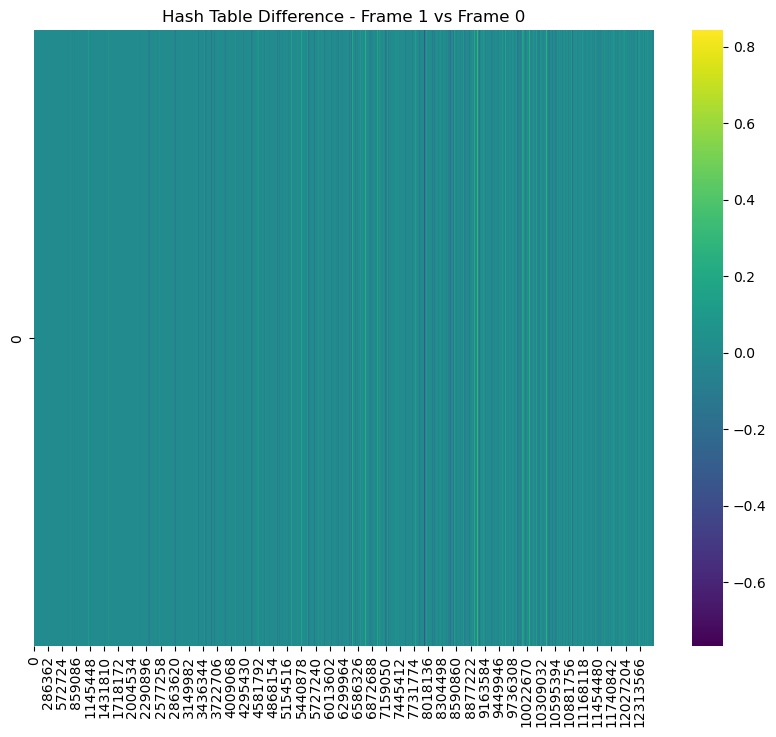

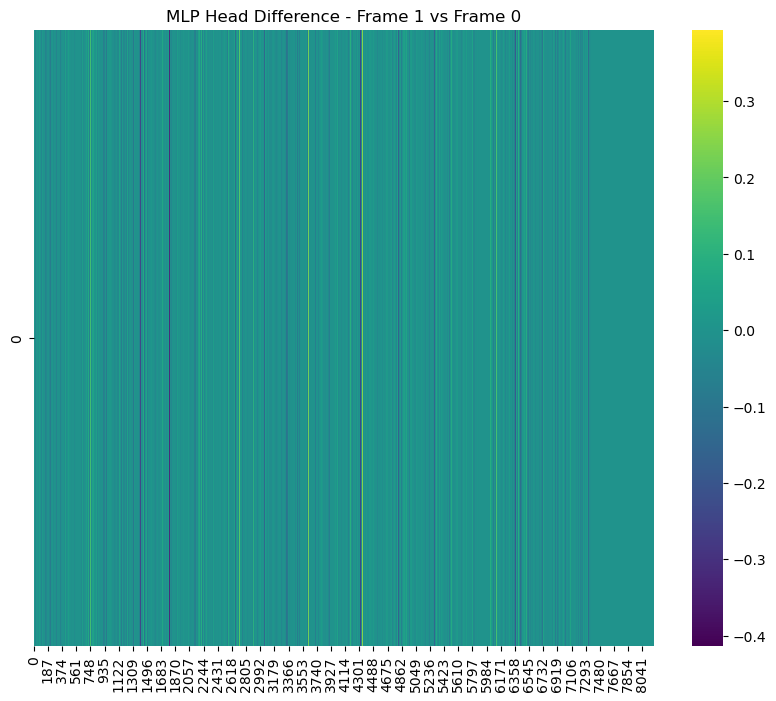

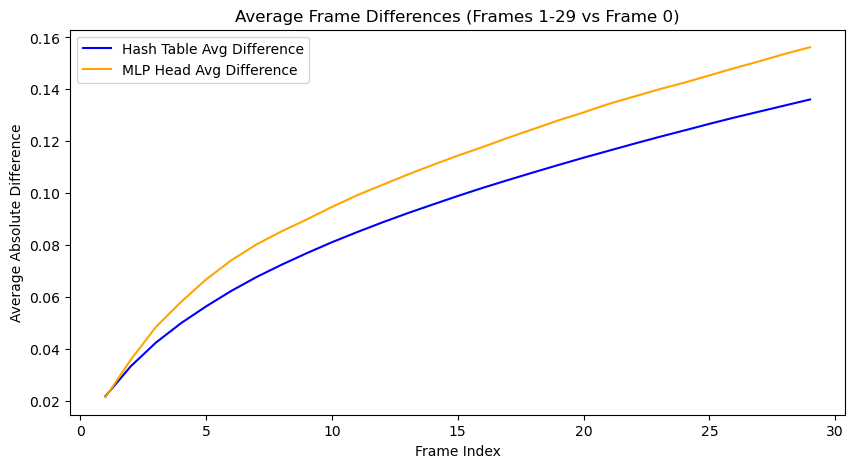

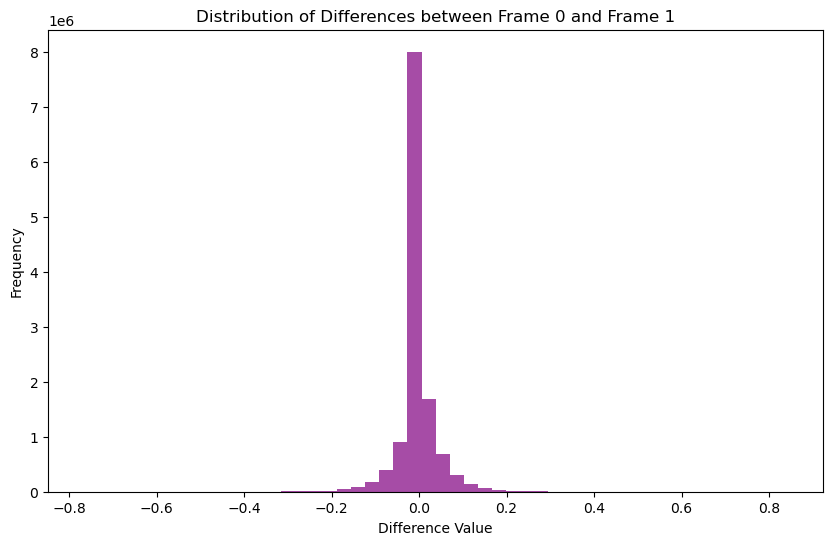

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Step 1: Load the npy file and extract the relevant data
params = np.load(f"../output/dynamic-test6/basketball/params.npy", allow_pickle=True).item()

# Extract hash_table and mlp_head from params
hash_table = params["hash_table"]
mlp_head = params["mlp_head"]

# Step 2: Verify the shapes of the data (optional)
print("Hash Table shape:", hash_table.shape)
print("MLP Head shape:", mlp_head.shape)

# Step 3: Function to plot heatmaps for each frame
def plot_heatmap(data, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(data, cmap='viridis')
    plt.title(title)
    plt.show()

# Step 4: Compute the difference between frame 0 and frames 1 to 29
def compute_frame_difference_from_first(data):
    first_frame = data[0]
    differences = []
    for i in range(1, data.shape[0]):  # Compare each frame with the first one
        diff = data[i] - first_frame
        differences.append(diff)
    return np.array(differences)

# Calculate differences for hash_table and mlp_head
hash_diff_from_first = compute_frame_difference_from_first(hash_table)
mlp_diff_from_first = compute_frame_difference_from_first(mlp_head)

# # Step 5: Visualize the differences as heatmaps (1st to 29th frame vs 0th frame)
for i in range(1, min(30, hash_diff_from_first.shape[0])):  # Limit to first 29 frames
    if i != 1:
        continue
    # Plot heatmap for hash_table differences
    plot_heatmap(hash_diff_from_first[i - 1].reshape(1, -1), f'Hash Table Difference - Frame {i} vs Frame 0')
    
    # Plot heatmap for mlp_head differences
    plot_heatmap(mlp_diff_from_first[i - 1].reshape(1, -1), f'MLP Head Difference - Frame {i} vs Frame 0')

# Step 6: Compute summary statistics of the differences
def summarize_differences(diff_data):
    avg_diff = np.mean(np.abs(diff_data), axis=1)  # Mean absolute difference for each frame
    return avg_diff

# Summarize differences for hash_table and mlp_head
hash_diff_summary = summarize_differences(hash_diff_from_first)
mlp_diff_summary = summarize_differences(mlp_diff_from_first)

# Step 7: Plot the frame-by-frame difference summary
plt.figure(figsize=(10, 5))
plt.plot(range(1, min(30, hash_diff_summary.shape[0]) + 1), hash_diff_summary[:29], label='Hash Table Avg Difference', color='blue')
plt.plot(range(1, min(30, mlp_diff_summary.shape[0]) + 1), mlp_diff_summary[:29], label='MLP Head Avg Difference', color='orange')
plt.title('Average Frame Differences (Frames 1-29 vs Frame 0)')
plt.xlabel('Frame Index')
plt.ylabel('Average Absolute Difference')
plt.legend()
plt.show()


differences = hash_table[1] - hash_table[0]
plt.figure(figsize=(10, 6))
plt.hist(differences.flatten(), bins=50, color='purple', alpha=0.7)
plt.title('Distribution of Differences between Frame 0 and Frame 1')
plt.xlabel('Difference Value')
plt.ylabel('Frequency')
plt.show()
